In [1]:
%matplotlib inline

# Week 3 - BiGram Model Exercise

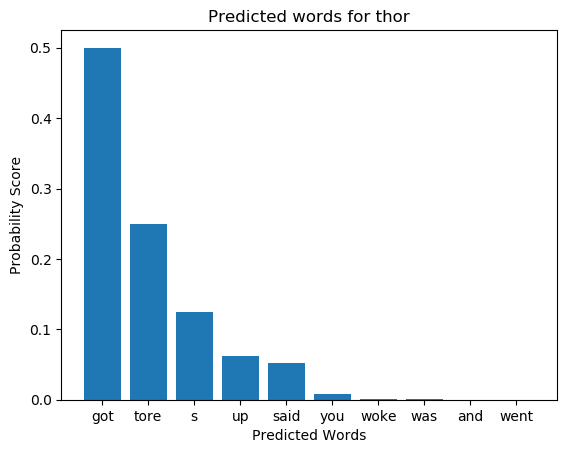

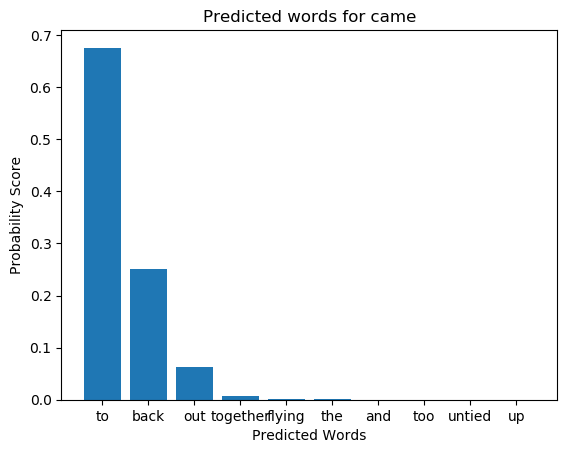

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 17 11:54:01 2019

@author: yuvaraja manikandan
"""


# Data Set Source
# https://github.com/numenta/nupic.nlp-examples.git
# https://github.com/numenta/nupic.nlp-examples/tree/master/resources/text

#This code may have snippets taken from the Internet

from nltk import bigrams

import matplotlib.pyplot as plt
import numpy as np

import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

plt.rcdefaults()

#corpusdir = '/your/Corpus/'  # point to the Directory of corpus.
#corpusdir = 'D:/Jupyter_Notebooks/NPTEL/ANLP/corpus'
corpusdir = 'D:/Jupyter_Notebooks/github/nupic.nlp-examples/resources/text'
your_corpus = PlaintextCorpusReader(corpusdir, '.*')

#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in your_corpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model


def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)


    if(len(top10words) > 0):
        predicted_words = list(zip(*top10words))[0]
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
    
        # calculate slope and intercept for the linear trend line
        slope, intercept = np.polyfit(x_pos, probability_score, 1)
    
        plt.bar(x_pos, probability_score,align='center')
        plt.xticks(x_pos, predicted_words)
        plt.ylabel('Probability Score')
        plt.xlabel('Predicted Words')
        plt.title('Predicted words for ' + first_word)
        plt.show()
    else:
        print("No history for the given sequence found...", first_word)

predict_next_word('thor')
predict_next_word('came')

# Week 3 - TriGram Model Exercise

No history for the given sequence found... thor asgard


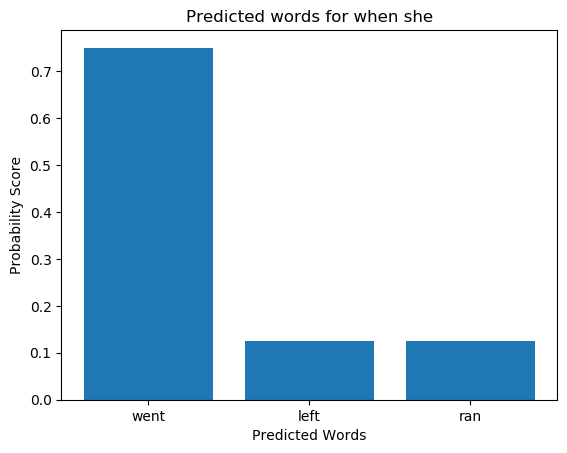

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 17 12:53:58 2019

@author: yuvaraja manikandan
"""

# Data Set Source
# https://github.com/numenta/nupic.nlp-examples.git
# https://github.com/numenta/nupic.nlp-examples/tree/master/resources/text



#This code may have snippets taken from the Internet

from nltk import trigrams
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from collections import defaultdict
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

plt.rcdefaults()

#corpusdir = '/your/Corpus/'  # point to the Directory of corpus.
#corpusdir = 'D:/Jupyter_Notebooks/NPTEL/ANLP/corpus'
corpusdir = 'D:/Jupyter_Notebooks/github/nupic.nlp-examples/resources/text'
your_corpus = PlaintextCorpusReader(corpusdir, '.*')

# Compute Trigram Model
def build_trigram_model():
    """
    Using corpusdir directory contents as corpus
    constructs a tri-gram model
    and returns it
    """
    trigram_model = defaultdict(lambda: defaultdict(lambda: 0))
    for sentence_words in your_corpus.sents():
        #Convert to lower case and consider only alpha
        sentence_words = [w.lower() for w in sentence_words if w.isalpha()]
        
        # Collect Tri-grams
        for w1, w2, w3 in trigrams(sentence_words):
            trigram_model[(w1,w2)][w3] += 1
        
        # Compute the probability for the trigram with w1,w2
        for w1_w2 in trigram_model:
            # total count of bi-grams starting with w1
            trigram_count_of_w1w2 = float(sum(trigram_model[w1_w2].values()))
            # Distribute the probability mass for all trigrams starting with w1_w2
            for w3 in trigram_model[w1_w2]:
                trigram_model[w1_w2][w3] /= trigram_count_of_w1w2
    return trigram_model

def predict_next_word(first_word, second_word):
    """
    Using tri-gram model over corpusdir,
    predicts next word for given pair of words
    and plots the bar chart of 
    next word probability
    """
    # Build the tri-gram model using corpus_dir
    trigram_model = build_trigram_model()
    
    # get the next word dict for the given 1st, 2nd word
    next_word = trigram_model[(first_word, second_word)]
    
    # Get top 10 words whose first two words are first_word and second_word
    top10words = Counter(next_word).most_common(10)
    
    if(len(top10words) > 0):
        predicted_words = list(zip(*top10words))[0]
        probability_score = list(zip(*top10words))[1]
        x_pos = np.arange(len(predicted_words))
    
        # calculate slope and intercept for the linear trend line
        slope, intercept = np.polyfit(x_pos, probability_score, 1)
    
        plt.bar(x_pos, probability_score,align='center')
        plt.xticks(x_pos, predicted_words)
        plt.ylabel('Probability Score')
        plt.xlabel('Predicted Words')
        plt.title('Predicted words for ' + first_word + ' ' + second_word)
        plt.show()
    else:
        print("No history for the given sequence found...", first_word, second_word)

#predict_next_word("how", "far")
#predict_next_word("stone", "is")
#predict_next_word("acceleration", "bullet")

predict_next_word("thor", "asgard")
predict_next_word("when", "she")